In [1]:
%matplotlib inline

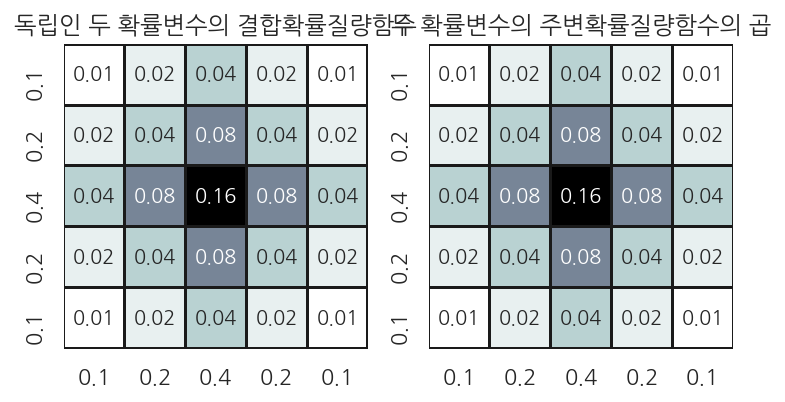

In [3]:
pmf1 = np.array([[1, 2,  4, 2, 1],
                 [2, 4,  8, 4, 2],
                 [4, 8, 16, 8, 4],
                 [2, 4,  8, 4, 2],
                 [1, 2,  4, 2, 1]])
pmf1 = pmf1/pmf1.sum()

pmf1_marginal_x = np.round(pmf1.sum(axis=0), 2)
pmf1_marginal_y = np.round(pmf1.sum(axis=1), 2)
pmf1x = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]

plt.figure(facecolor="1.")
plt.subplot(121)
sns.heatmap(pmf1, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title("독립인 두 확률변수의 결합확률질량함수")

plt.subplot(122)
pmf1x = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]
sns.heatmap(pmf1x, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title("두 확률변수의 주변확률질량함수의 곱")

plt.show()

In [4]:
from sklearn.datasets import load_iris
X = load_iris().data
x1 = X[:, 0]  # 꽃받침의 길이
x2 = X[:, 1]  # 꽃받침의 폭
x3 = X[:, 2]  # 꽃잎의 길이
x4 = X[:, 3]  # 꽃잎의 폭
sp.stats.pearsonr(x1, x3)[0]

0.8717537758865832

In [5]:
# 연습문제 7.5.1
#(1) 꽃받침의 길이와 꽃받침의 폭 사이의 상관계수
sp.stats.pearsonr(x1, x2)[0]


-0.11756978413300204

In [6]:
# (2) 꽃잎의 길이와 꽃잎의 폭 사이의 상관계수
sp.stats.pearsonr(x3, x4)[0]

0.962865431402796

In [9]:
# (3) 꽃받침의 폭과 꽃잎의  폭 사이의 상관계수
sp.stats.pearsonr(x2, x4)[0]

AttributeError: module 'scipy.stats' has no attribute 'pearsonp'

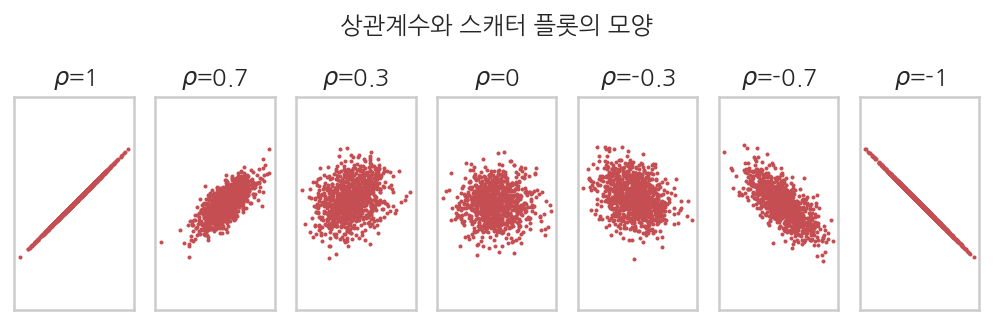

In [10]:
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 2), facecolor="1.")
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r"$\rho$={}".format(r))

plt.suptitle("상관계수와 스캐터 플롯의 모양", y=1.1)
plt.tight_layout()
plt.show()

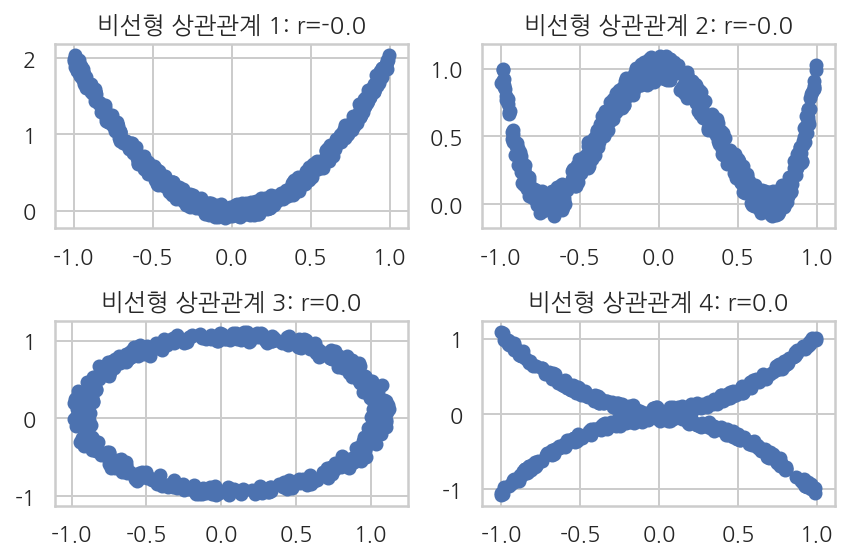

In [12]:
# 비선형 상관관계
n = 500
np.random.seed(1)
plt.figure(facecolor="1.")
plt.subplot(221)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-0.1, 0.1, n)
plt.scatter(x1, y1)
r1 = sp.stats.pearsonr(x1, y1)[0]
plt.title(r"비선형 상관관계 1: r={:3.1f}".format(r1))
plt.subplot(222)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + 0.1 * np.random.uniform(-1, 1, n)
plt.scatter(x2, y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(r"비선형 상관관계 2: r={:3.1f}".format(r2))
plt.subplot(223)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
r3 = sp.stats.pearsonr(x3, y3)[0]
plt.title(r"비선형 상관관계 3: r={:3.1f}".format(r3))
plt.subplot(224)
x4 = np.random.uniform(-1, 1, n)
y4 = (x4**2 + np.random.uniform(0, 0.1, n)) * \
    np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x4, y4)
r4 = sp.stats.pearsonr(x4, y4)[0]
plt.title(r"비선형 상관관계 4: r={:3.1f}".format(r4))
plt.tight_layout()
plt.show()

In [ ]:
# 피어슨 상관관계는 직선인 상관관계는 캐치할수 있지만 비선형인 상관관계는 캐치할수 없음
# 아웃라이어에도 민감하게 반응할수 있다

### 사이파이를 이용한 확률분포 분석

In [13]:
import scipy.stats

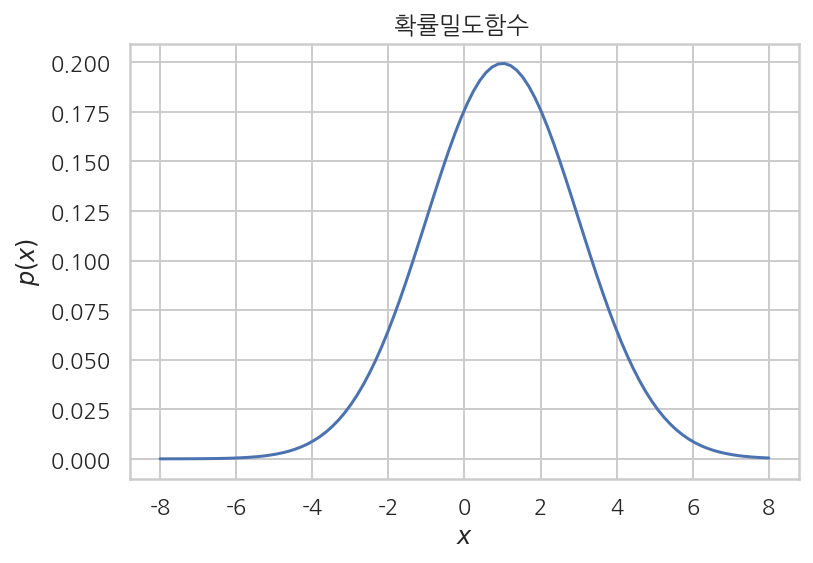

In [18]:
rv = sp.stats.norm(loc=1, scale=2)

xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.figure(facecolor="1.")
plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

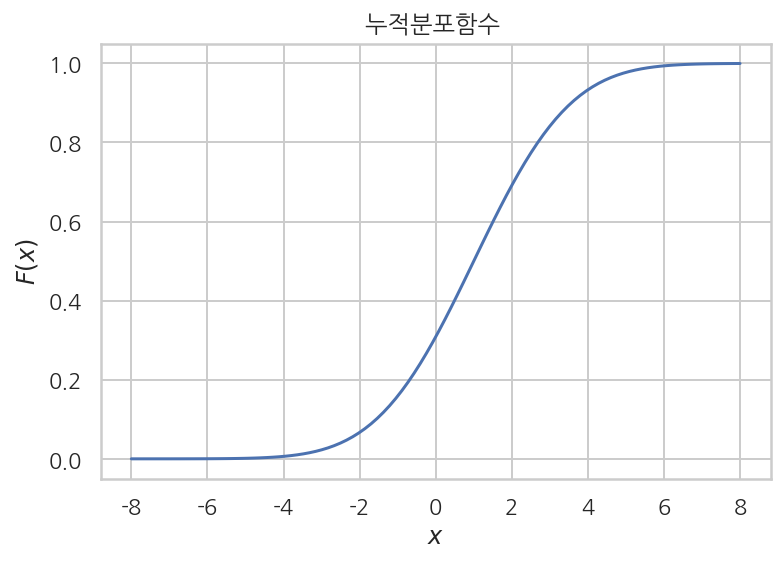

In [20]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.figure(facecolor="1.")
plt.plot(xx, cdf)
plt.title("누적분포함수 ")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

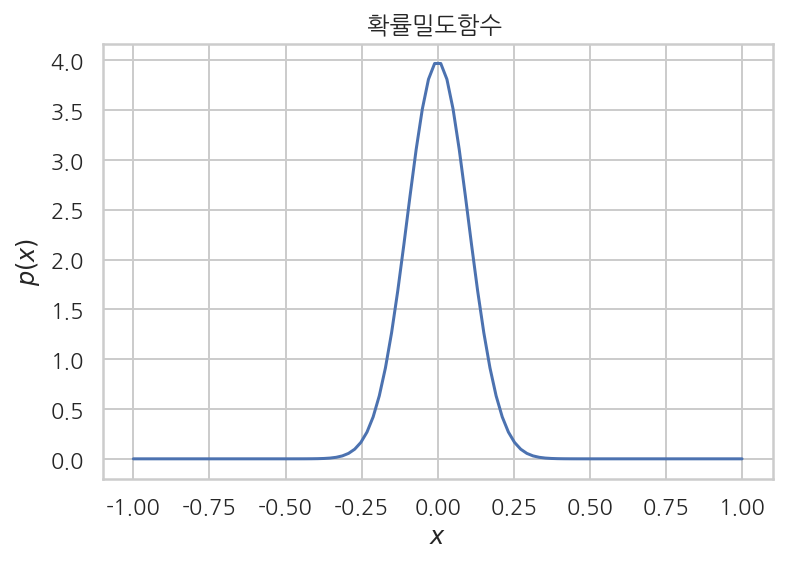

In [16]:
# 연습문제 8.1.1
# (1) 기대값이 0이고 표준 편차가 0.1인 정규분포 객체와 확률밀도 함수
rv = sp.stats.norm(loc=0, scale=0.1)

xx = np.linspace(-1, 1, 100)
pdf = rv.pdf(xx)
plt.figure(facecolor="1.")
plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

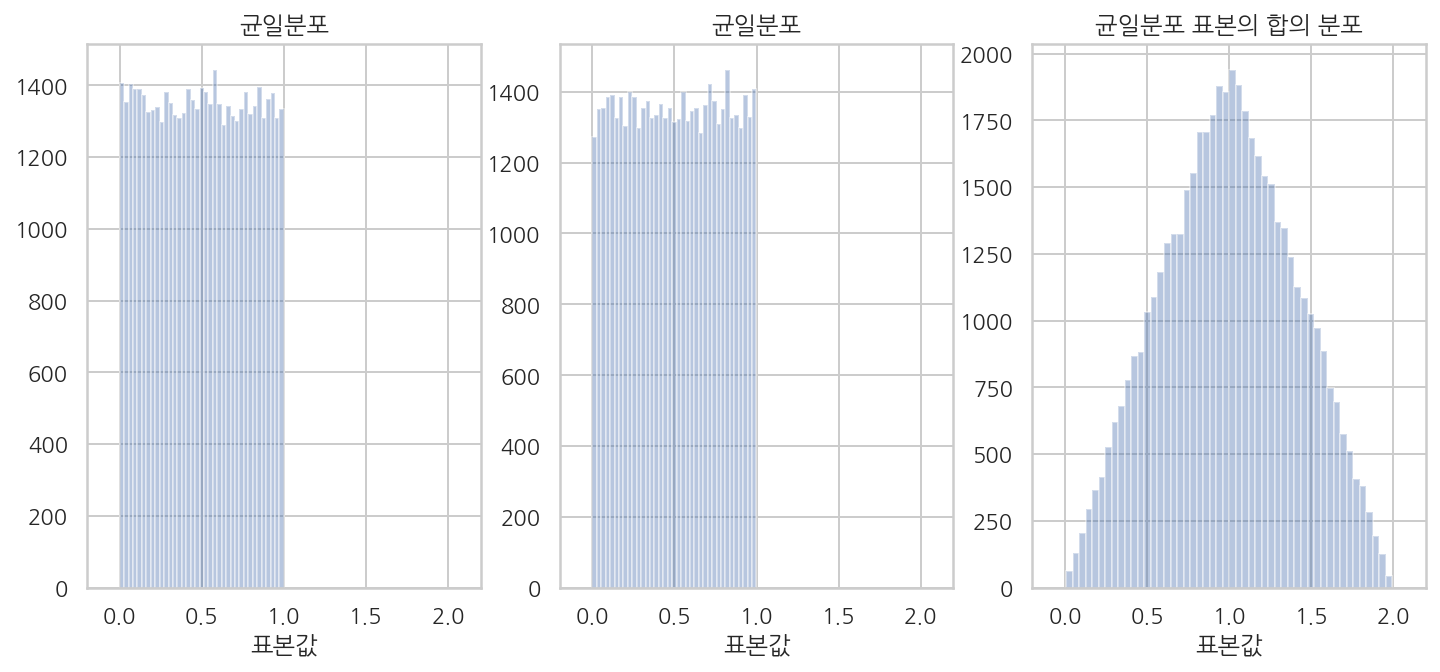

In [21]:
rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)
x_3 = x_1 + x_2

plt.figure(figsize=(12, 5), facecolor="1.")

plt.subplot(131)
sns.distplot(x_1, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(132)
sns.distplot(x_2, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(133)
sns.distplot(x_3, kde=False)
plt.title("균일분포 표본의 합의 분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.show()

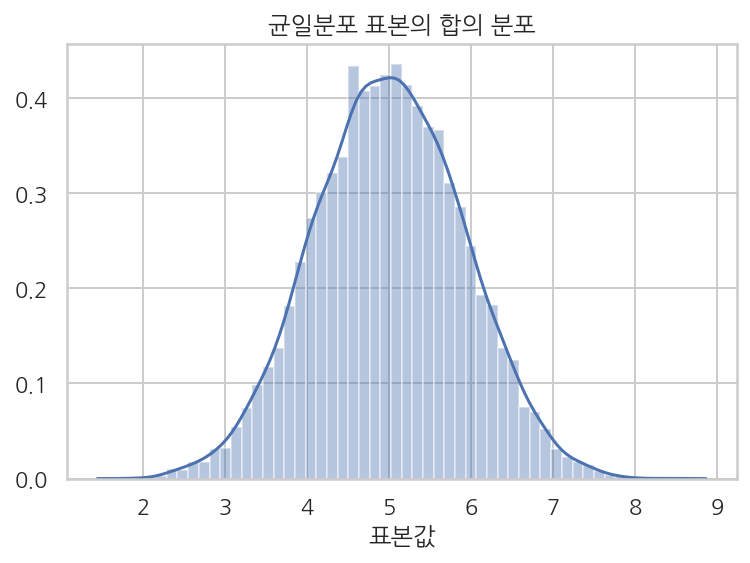

In [29]:
np.random.seed(0)
x = sp.stats.uniform().rvs((10, 10000))
s = x.sum(axis=0)

plt.figure(facecolor="1.")

sns.distplot(s)
plt.title("균일분포 표본의 합의 분포")
plt.xlabel("표본값")

plt.show()

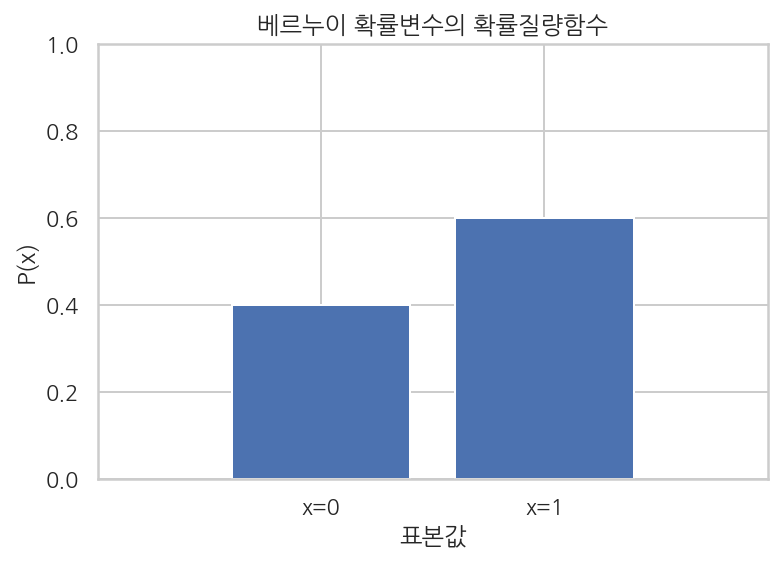

In [30]:
mu = 0.6
rv = sp.stats.bernoulli(mu)

xx = [0, 1]
plt.figure(facecolor="1.")
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

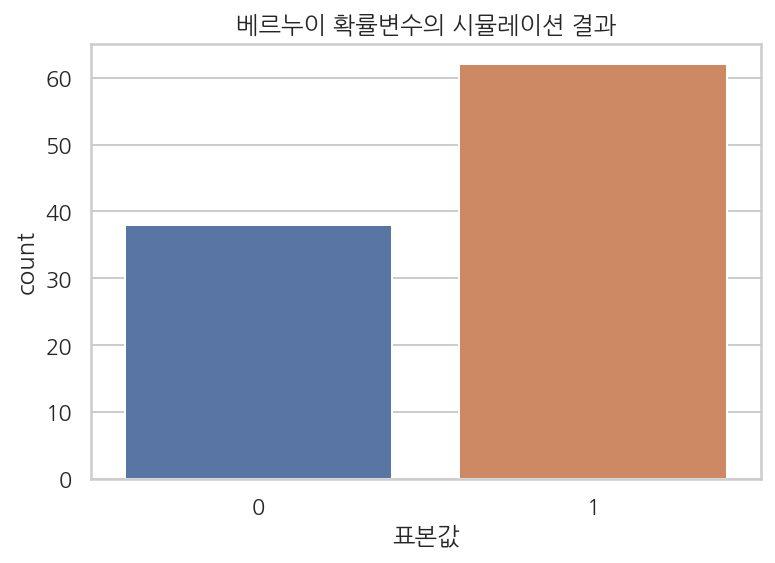

In [32]:
x = rv.rvs(100, random_state=0)

plt.figure(facecolor="1.")
sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

In [33]:
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
df.index = [0, 1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


In [34]:
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]
df2

,표본값,유형,비율
0,0,이론,0.40
1,0,시뮬레이션,0.38
2,1,이론,0.60
3,1,시뮬레이션,0.62


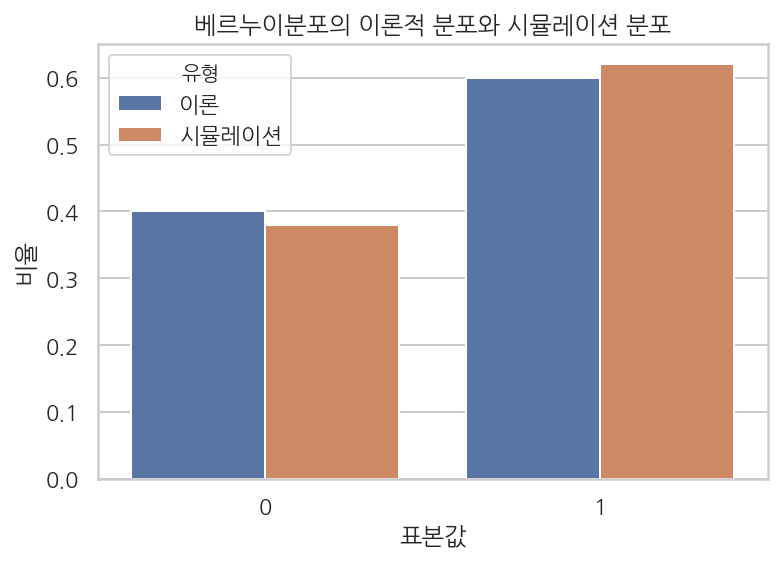

In [35]:
plt.figure(facecolor="1.")
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("베르누이분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

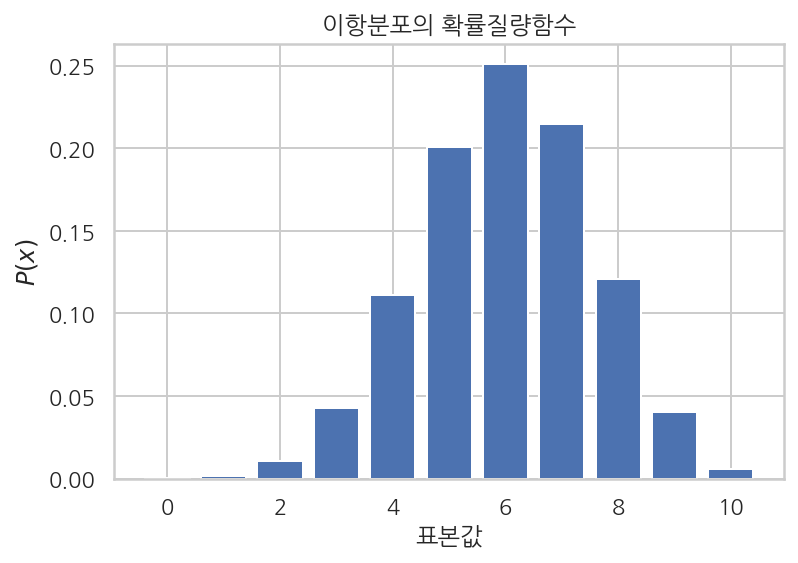

In [38]:
N = 10
mu = 0.6
rv = sp.stats.binom(N, mu)

xx = np.arange(N + 1)
plt.figure(facecolor="1.")
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()

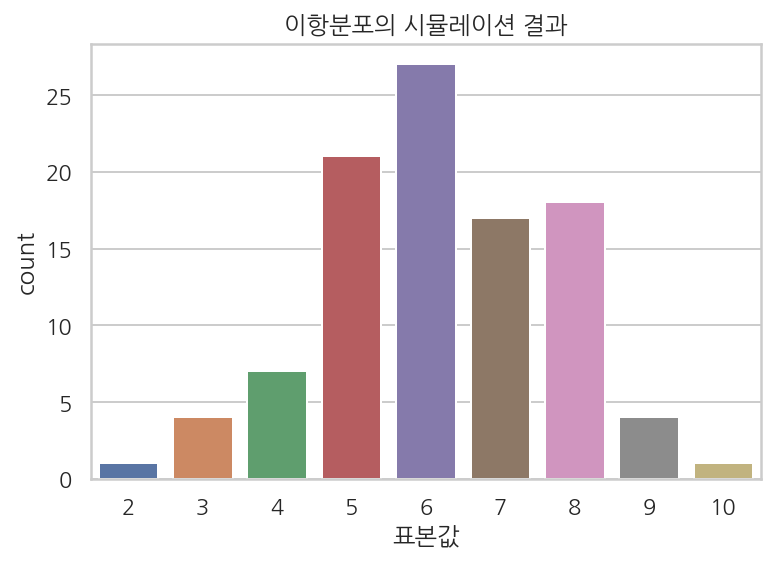

In [39]:
np.random.seed(0)
x = rv.rvs(100)

plt.figure(facecolor="1.")
sns.countplot(x)
plt.title("이항분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

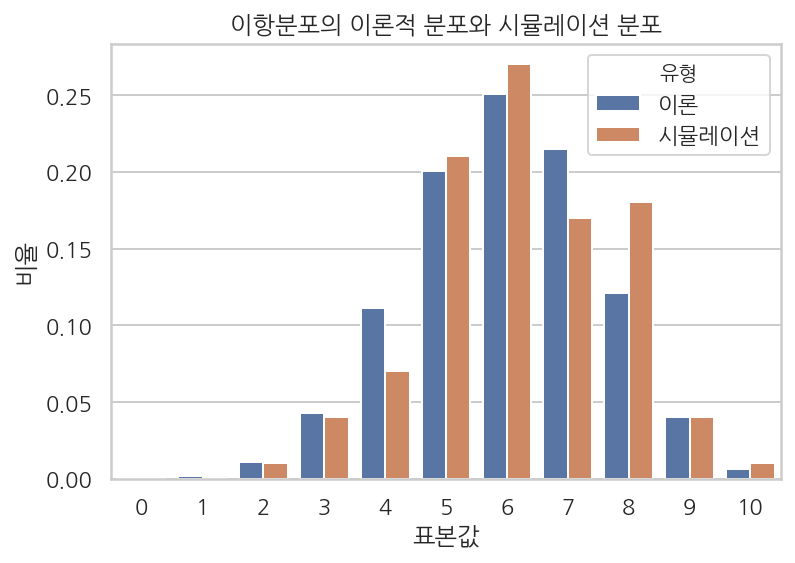

In [40]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")

plt.figure(facecolor="1.")
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("이항분포의 이론적 분포와 시뮬레이션 분포")
plt.show()